In [1]:
from utils import *
from mnist_tasks.mnist_loader import valid_set
from torch.utils.data import DataLoader, random_split

/hdd2/dyah/anaconda3/envs/causal/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Compose(
    Grayscale(num_output_channels=3)
    ToTensor()
    Normalize(mean=[0.5], std=[0.5])
)
Train data set: 54000
Test data set: 10000
Valid data set: 6000
538


In [2]:
digits_to_store = [0,1]
spurious_p = 0.225
random_p = 1 - spurious_p

batch_size = 1280

store_dir = "/hdd2/dyah/coloredmnist_synthetic_spurious"
if not os.path.isdir(store_dir):
    os.makedirs(store_dir)

In [11]:
# define the spurious environment
spurious_env_b, spurious_colors_b = random_generator["background"](digits_to_store, return_keys=True)
flip_map = generate_random_flip_map()
spurious_env_b_flip = flip_digit_color(flip_map, spurious_env_b)

spurious_env_d, spurious_colors_d = random_generator["digit"](digits_to_store, return_keys=True, forbidden_colors=spurious_colors_b)
spurious_env_d_flip = flip_digit_color(flip_map, spurious_env_d)

forbidden_colors = [c_ for c_ in spurious_colors_b]
forbidden_colors.extend(spurious_colors_d)
# print(forbidden_colors)
random_color_keys = generate_uncorrelated_color_keys(n=5, forbidden_colors=forbidden_colors)
print("random colors", random_color_keys)
print("spurious colors background", spurious_colors_b)

random colors ['blue', 'teal', 'orange', 'green', 'gray']
spurious colors background ['brown', 'violet']


In [12]:
# divide train and valid sets into 90-10 splits: 90 random color, 10 spurious color that will be flipped in test
# flip the 10% color for test set
val_rnd_size, val_spur_size = int(len(valid_set) * random_p), int(len(valid_set) * spurious_p)
val_rnd_set, val_spur_set = random_split(valid_set, [val_rnd_size, val_spur_size])
val_rnd_loader = DataLoader(val_rnd_set, batch_size=batch_size, shuffle=False)
val_spur_loader = DataLoader(val_spur_set, batch_size=batch_size, shuffle=False)

0it [00:00, ?it/s]/hdd2/dyah/sicheng_test/comnivore/libs/synthetic_colored_mnist/utils.py:62: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  /pytorch/aten/src/ATen/native/IndexingUtils.h:25.)
  imgs = imgs[mask,:,:,:]
/hdd2/dyah/sicheng_test/comnivore/libs/synthetic_colored_mnist/utils.py:63: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  /pytorch/aten/src/ATen/native/IndexingUtils.h:25.)
  labels = labels[mask]
4it [00:21,  5.37s/it]


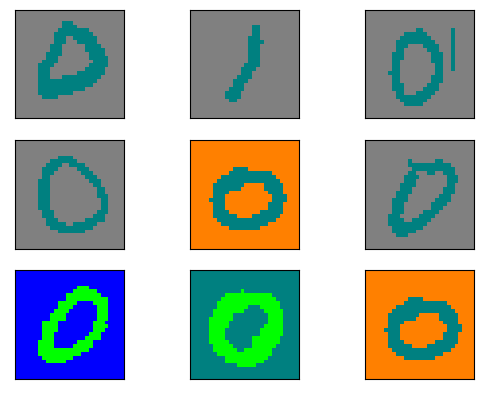

In [13]:
val_random_images, val_random_labels = transform_image_random(val_rnd_loader, possible_color_keys=random_color_keys, mode="full")
show_random_images(val_random_images)

0it [00:00, ?it/s]/hdd2/dyah/sicheng_test/comnivore/libs/synthetic_colored_mnist/utils.py:27: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  /pytorch/aten/src/ATen/native/IndexingUtils.h:25.)
  imgs = imgs[mask,:,:,:]
/hdd2/dyah/sicheng_test/comnivore/libs/synthetic_colored_mnist/utils.py:28: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  /pytorch/aten/src/ATen/native/IndexingUtils.h:25.)
  labels = labels[mask]
/hdd2/dyah/sicheng_test/comnivore/libs/synthetic_colored_mnist/mnist_tasks/generate_color_mnist.py:70: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "transform_background_color" failed type inference due to: non-precise type pyobject
During: typing of argument at /hdd2/dyah/sicheng_test/comnivore/libs/synthetic_colored_mnist/mnist_tasks/generate_color_mnist.py (72

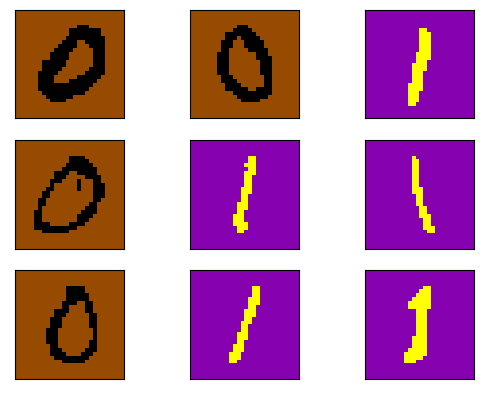

In [14]:
val_spur_images, val_spur_labels = transform_image_with_env([spurious_env_b, spurious_env_d], val_spur_loader, mode="full")
show_random_images(val_spur_images)